# 📈 Sales Forecasting with Linear Regression and Prophet

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv("sales_forecasting.csv")
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Category,SalesAmount
0,2022-01-01,Bikes,28633.52
1,2022-02-01,Bikes,33242.86
2,2022-03-01,Bikes,36793.83
3,2022-04-01,Bikes,39412.14
4,2022-05-01,Bikes,43830.47


In [3]:
# Filter for one category
category = 'Bikes'
df_cat = df[df['Category'] == category].copy()
df_cat['MonthIndex'] = np.arange(len(df_cat))

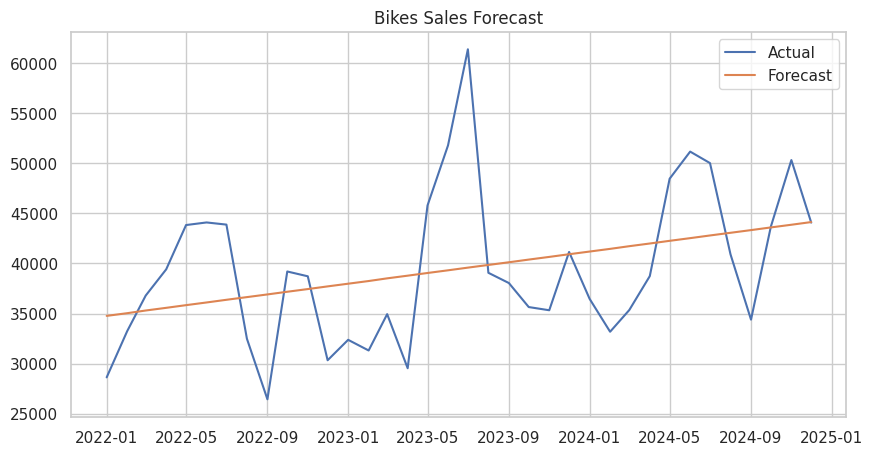

In [4]:
# Linear Regression
model = LinearRegression()
model.fit(df_cat[['MonthIndex']], df_cat['SalesAmount'])
df_cat['Forecast'] = model.predict(df_cat[['MonthIndex']])

plt.figure(figsize=(10,5))
plt.plot(df_cat['Month'], df_cat['SalesAmount'], label='Actual')
plt.plot(df_cat['Month'], df_cat['Forecast'], label='Forecast')
plt.legend()
plt.title(f"{category} Sales Forecast")
plt.show()

12:56:45 - cmdstanpy - INFO - Chain [1] start processing
12:56:45 - cmdstanpy - INFO - Chain [1] done processing


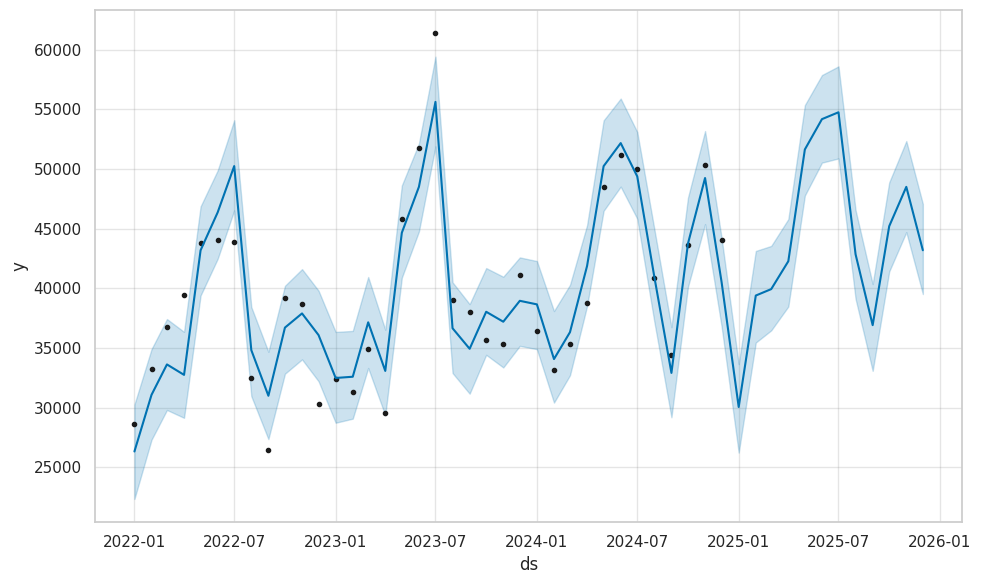

In [7]:
# Optional: Prophet forecasting
try:
    from prophet import Prophet
    df_prophet = df_cat[['Month', 'SalesAmount']].rename(columns={"Month": "ds", "SalesAmount": "y"})
    m = Prophet()
    m.fit(df_prophet)
    future = m.make_future_dataframe(periods=12, freq='MS')
    forecast = m.predict(future)
    fig = m.plot(forecast)
except ImportError:
    print("Prophet not installed. Skipping Prophet forecast.")